# dev data parsing

In [1]:
from lib.my_initialization import *
import random,scipy
from lib.measure.compute_slope import *
from lib.measure.compute_sliding_slope import *
from lib.measure.powerlaw import *
%load_ext autoreload
%autoreload 2

from scipy import stats
alpha=0.1

- TODO: plot the log output over some axis of the input_parameter space  space
- TODO: measure the slope/turning points for a given log output
- TODO: learn the slope/turning points using state space
- TODO: tensorflow jupyter notebook stackoverflow 

# DONE: make a command line executable that filters Log and returns a merged pandas.Dataframe as *.csv

In [2]:
# def filter_log(input_fn,qfoo=None):
#     # qfoo_pbc=lambda dict_inputs:dict_inputs['reflect']==0 #periodic bc
#     qfoo_rbc=lambda dict_inputs:dict_inputs['reflect']==1 #reflecting bc
#     qfoo=qfoo_rbc
#     df=parse_log(input_fn,qfoo,include_inputs=True,printing=False)
#     return df

In [8]:

# TODO: for each input_fn in input_fn_lst 
# TODO:   get inputs as df_inputs
# TODO:   if input_query_function(df_inputs):
# TODO:     get outputs as df and append inputs to fields   
#return df
# TODO: return pd.concatenate(df_lst)

In [9]:
# from lib import *

In [2]:
#input qfoo
# TODO(later): prompt user for input_query_function=lambda df: foo(df)
#get folder
qfoo=eval(input('Please enter a query function of the form "lambda dict_inputs:dict_inputs["reflect"]==0": \n'))
# prompt user for save_fn
save_fn = str(input("Please enter save folder name: \n"))
nb_dir='/home/timothytyree/Documents/GitHub/bgmc/python'
data_dir=f"{nb_dir}/data/osg_output/Log"
save_folder=f"{nb_dir}/data/osg_output/{save_fn}"
try:
    os.mkdir(save_folder)
except Exception as e:
    pass
#get df
#     retval_lst=filter_folder(folder=data_dir,qfoo=None, save_folder=save_folder)
#     # df=pd.concat(df_lst).reset_index(drop=True)
#     # df.to_csv(save_dir,index=False)
#     print(f"the total number of trials matching query was {len(df_lst)}")
#     print(f"final DataFrame stored in {save_dir}")
#     beep = lambda x: os.system("echo -n '\\a';sleep 1.2;" * x)
#     beep(3)
#     print("Nota Bene: the output is currently not performing the average over logs (6x compression advisable...)")


Please enter a query function of the form "lambda dict_inputs:dict_inputs["reflect"]==0": 
lambda dict_inputs:dict_inputs["reflect"]==0
Please enter save folder name: 
filter_pbc


In [11]:
#TODO: compute average over each condition by using .mean() on the groupby of all coll_names except CollTime

In [ ]:
#TODO: make command line function save each csv to a new folder

In [3]:
folder=data_dir
input_fn_lst=get_files_in_folder(folder,trgt='.out.')
print(f"searching {len(input_fn_lst)} files...")
def routine(input_fn):
    try:
        return filter_log(input_fn,save_folder,qfoo)
    except Exception as e:
        return e
# bag = db.from_sequence(input_fn_lst, npartitions=11).map(routine)
# start = time.time()
# retval_lst = list(bag)
# print(f"the run time for filtering files was {time.time()-start:.2f} seconds.")
# return retval_lst

searching 1365397 files...


In [4]:
routine(os.path.abspath(input_fn_lst[0]))

'job.out.8883430.271624'

In [12]:
#     qfoo=eval(input('Please enter a query function of the form "lambda dict_inputs:dict_inputs["reflect"]==0":\n'))
# prompt user for save_fn
#     save_fn = str(input("Please enter save file name:\n"))
nb_dir='/home/timothytyree/Documents/GitHub/bgmc/python'
data_dir=f"{nb_dir}/data/osg_output/Log"
#     save_dir=f"{nb_dir}/data/osg_output/{save_fn}"

input_fn_lst=get_files_in_folder(folder=data_dir,trgt='.out.')
input_fn=input_fn_lst[0]
n_input,n_output=parse_iolines(input_fn, printing=False)
n_input

14

In [13]:
filter_log(input_fn,qfoo=lambda dict_inputs:dict_inputs["reflect"]==0)


,N,CollTime,r,D,L,kappa,beta,reflect,set_second,niter,dt
0,12,0.402030,0.2,4,15.8114,55,0.1,0,0,250,0.00001
1,13,0.339076,0.2,4,15.8114,55,0.1,0,0,250,0.00001
2,14,0.308924,0.2,4,15.8114,55,0.1,0,0,250,0.00001
3,15,0.270279,0.2,4,15.8114,55,0.1,0,0,250,0.00001
4,16,0.229521,0.2,4,15.8114,55,0.1,0,0,250,0.00001
...,...,...,...,...,...,...,...,...,...,...,...
684,696,0.000090,0.2,4,15.8114,55,0.1,0,0,250,0.00001
685,697,0.000090,0.2,4,15.8114,55,0.1,0,0,250,0.00001
686,698,0.000090,0.2,4,15.8114,55,0.1,0,0,250,0.00001
687,699,0.000090,0.2,4,15.8114,55,0.1,0,0,250,0.00001


# merge filtered folder results

In [34]:
# def merge_folder(folder,trgt='.out.',return_df=False):
#     '''merge all files in folder matching trgt.
#     runtime was ~10 seconds for ~3000 files.'''
#     #get all files in folder
#     assert(os.path.exists(folder))
#     input_fn_lst=get_files_in_folder(folder,trgt)
#     print(f"merging {len(input_fn_lst)} files...")
#     #merge all files in folder as df
#     df=pd.concat([pd.read_csv(fn) for fn in input_fn_lst])
#     #groupby col_names minus CollRate
#     param_names=sorted(set(df.columns.values).difference({'CollTime','Rad'}))[::-1]
#     #compute mean value
#     dfm=df.groupby(param_names).mean()
#     dfm.reset_index(inplace=True)
#     #compute CollRate and drop CollTime
#     dfm['CollRate']=1./dfm['CollTime'] #Hz
#     dfm.drop(columns=['CollTime'],inplace=True)
#     #save as csv
#     save_fn=os.path.basename(folder)+'.csv'
#     os.chdir(os.path.dirname(folder))
#     dfm.to_csv(save_fn,index=False)
#     print(f'mean Collision rates saved in\n{os.path.abspath(save_fn)}')
#     if return_df:
#         return dfm
#     else:
#         return True

In [40]:
folder=f"{nb_dir}/data/osg_output/run_5_all"
retval=merge_folder(folder, return_df=True)

merging 3242 files...
mean Collision rates saved in
/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_5_all.csv


# dev m and B extraction from trial
#TODO: dev turning_point and m_dense extraction from trial

In [8]:
data_dir="/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_6_all.csv"
df=pd.read_csv(data_dir)
df.head()

,set_second,reflect,r,niter,kappa,dt,N,L,Dt,D,CollRate
0,0,0,0.1,1500,5,0.00001,12,4.5,0.00001,0.2,0.457629
1,0,0,0.1,1500,5,0.00001,12,4.5,0.00001,1.0,0.489757
2,0,0,0.1,1500,5,0.00001,12,4.5,0.00001,1.5,0.472636
3,0,0,0.1,1500,5,0.00001,12,4.5,0.00001,2.0,0.518877
4,0,0,0.1,1500,5,0.00001,12,4.5,0.00001,3.0,0.517302


In [9]:
#TODO: slice df into something smaller...
#load osg data
# data_mc_fn='osg_output/run_6_all.csv'#run_1_to_3_merged.csv'
# df=pd.read_csv(data_mc_fn)
# df.drop(columns=['dt'],inplace=True)

#extract column values
r_values=np.array(sorted(set(df.r.values)))#cm
D_values=np.array(sorted(set(df.D.values)))#cm^2/s
L_values=np.array(sorted(set(df.L.values)))#cm
A_values=L_values**2#cm^2
kappa_values=np.array(sorted(set(df.kappa.values)))#1/s

#derived values
df['Dt_over_dt']=df.Dt/1e-5
df['A']=df['L']**2
df['q']=df['N']/df['A'] #number of tips per square centimeter
df['w']=df['CollRate']/df['A'] #[mHz?]/cm^2

Dt_over_dt_values=np.array(sorted(set(df.Dt_over_dt.values)))#1/s
# df['Dt_over_dt']=df.Dt/1e-5
# Dt_over_dt_values=np.array(sorted(set(df.Dt_over_dt.values)))#1/s
# # df['set_second']=0
# # df.drop('set_second',inplace=True)
beep(3)
# df.head()

0

In [10]:
query=(df.set_second==0)&(df.reflect==0)&(df.r==0.1)&(df.Dt==0.001)&(df.Dt==0.001)&(df.D==1.0)&(df.L==5.)&(df.kappa==80)
dg=df[query]
dg.head()

,set_second,reflect,r,niter,kappa,dt,N,L,Dt,D,CollRate,Dt_over_dt,A,q,w
3540139,0,0,0.1,1500,80,0.00001,12,5.0,0.001,1.0,4.652364,100.0,25.0,0.48,0.186095
3540511,0,0,0.1,1500,80,0.00001,13,5.0,0.001,1.0,5.539138,100.0,25.0,0.52,0.221566
3540883,0,0,0.1,1500,80,0.00001,14,5.0,0.001,1.0,6.657878,100.0,25.0,0.56,0.266315
3541255,0,0,0.1,1500,80,0.00001,15,5.0,0.001,1.0,7.714293,100.0,25.0,0.60,0.308572
3541627,0,0,0.1,1500,80,0.00001,16,5.0,0.001,1.0,8.944248,100.0,25.0,0.64,0.357770


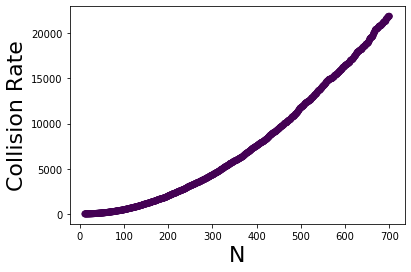

In [11]:
x_values=dg.N.values
y_values=dg.CollRate.values
c_values=dg.kappa

fontsize=22
plt.scatter(x_values,y_values,c=c_values)
plt.xlabel('N',fontsize=fontsize)
plt.ylabel('Collision Rate',fontsize=fontsize)
plt.show()

## visualize the effect of Dt_over_dt

for Dt/dt=1e+00, m=2.34865476.
for Dt/dt=1e+04, m=2.48014713.


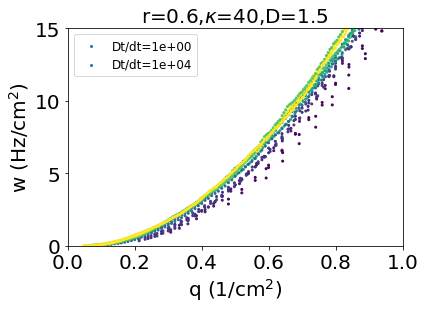

In [218]:
r=0.6;D=1.5;kappa=40;
query=(df.set_second==0)&(df.reflect==1)&(df.r==r)&(df.D==D)&(df.kappa==kappa)
title=f"r={r:.1f},"+r"$\kappa$="+f"{kappa:.0f},D={D}"#",L={L:.2f}"
dg=df[query].copy()
fontsize=20
for Dt_over_dt in [1,1e+4]:#Dt_over_dt_values:
    query = dg.Dt_over_dt==Dt_over_dt
    dg2=dg[query]
    x_values=dg2.q.values
    y_values=dg2.w.values
    c_values=dg2.A.values
#     x_values=dg2.N.values
#     y_values=dg2.CollRate.values
#     c_values=Dt_over_dt+0.*x_values


    plt.scatter(x_values,y_values,label=f'Dt/dt={Dt_over_dt:.0e}',s=4,c=c_values)#,c=c_values)
    x=x_values[:50]
    y=y_values[:50]
    dict_out=compute_95CI_ols(np.log(x),np.log(y))
    m=dict_out['m']
    print(f'for Dt/dt={Dt_over_dt:.0e}, m={m:.8f}.')
plt.title(title,fontsize=fontsize)
plt.xlabel(r'q (1/cm$^2$)',fontsize=fontsize)
plt.ylabel(r'w (Hz/cm$^2$)',fontsize=fontsize)
# plt.xlabel('N',fontsize=fontsize)
# plt.ylabel('Collision Rate',fontsize=fontsize)
# plt.xscale('log')
# plt.yscale('log')
plt.xlim([0,1])
# plt.ylim([0,4])
plt.ylim([0,15])
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-8)#,ncol=2)
plt.show()

for q>0.2 and q<1.0,
	for Dt/dt=1e+00, m=1.4194+-0.0416.
	for Dt/dt=1e+04, m=1.4389+-0.0409.


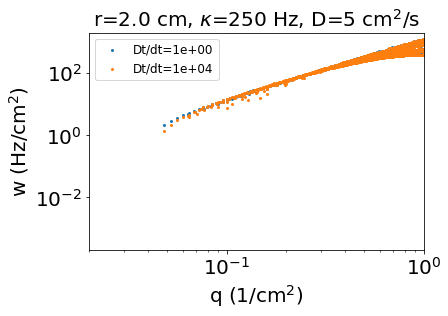

In [370]:
# r=0.2;D=5;kappa=250;
# r=0.2;D=1.5;kappa=250;
# r=1.0;D=5;kappa=250;
r=2.0;D=5;kappa=250;
# r=0.6;D=1.5;kappa=40;
query=(df.set_second==0)&(df.reflect==0)&(df.r==r)&(df.D==D)&(df.kappa==kappa)
title=f"r={r:.1f} cm, "+r"$\kappa$="+f"{kappa:.0f} Hz, D={D}"+r" cm$^2$/s"#",L={L:.2f}"
dg=df[query].copy()
fontsize=20
q_min=0.2;q_max=1.0
print(f"for q>{q_min} and q<{q_max},")
for Dt_over_dt in [1.,1.e+4]:#Dt_over_dt_values:
    query = dg.Dt_over_dt==Dt_over_dt
    dg2=dg[query].sort_values('q')
    x_values=dg2.q.values#*dg2.L.values**.5
    y_values=dg2.w.values#*dg2.L.values**.5
    c_values=dg2.A.values
#     x_values=dg2.N.values
#     y_values=dg2.CollRate.values
#     c_values=Dt_over_dt+0.*x_values


    plt.scatter(x_values,y_values,label=f'Dt/dt={Dt_over_dt:.0e}',s=4)#,c=c_values)#,c=c_values)
    boo=(x_values>q_min)&(x_values<q_max)
    x=x_values[boo]
    y=y_values[boo]
    dict_out=compute_95CI_ols(np.log(x),np.log(y))
    m=dict_out['m']
    Delta_m=dict_out['Delta_m']
    print(f'\tfor Dt/dt={Dt_over_dt:.0e}, m={m:.4f}+-{Delta_m:.4f}.')
plt.title(title,fontsize=fontsize)
plt.xlabel(r'q (1/cm$^2$)',fontsize=fontsize)
plt.ylabel(r'w (Hz/cm$^2$)',fontsize=fontsize)
# plt.xlabel('N',fontsize=fontsize)
# plt.ylabel('Collision Rate',fontsize=fontsize)
plt.xscale('log')
plt.yscale('log')
plt.xlim([.02,1])
plt.ylim([0.0002,2000])
# plt.xlim([0.02,100])
# plt.ylim([0.0002,10000])
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-8)#,ncol=2)
plt.show()

for q>0.2,
for Dt/dt=1e+04, m=1.96707620.


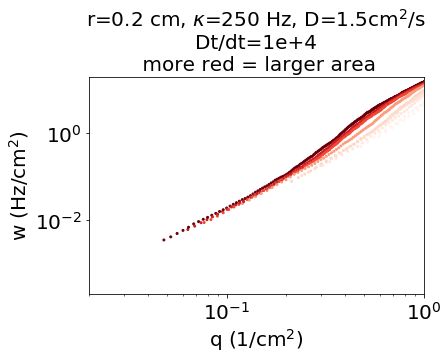

In [232]:
r=0.2;D=1.5;kappa=250;
# r=0.6;D=1.5;kappa=40;
query=(df.set_second==0)&(df.reflect==0)&(df.r==r)&(df.D==D)&(df.kappa==kappa)
title=f"r={r:.1f} cm, "+r"$\kappa$="+f"{kappa:.0f} Hz, D={D}"+r"cm$^2$/s"+u"\nDt/dt=1e+4\n more red = larger area"#",L={L:.2f}"
dg=df[query].copy()
fontsize=20
q_min=0.2
print(f"for q>{q_min},")
for Dt_over_dt in [1.e+4]:#Dt_over_dt_values:
    query = dg.Dt_over_dt==Dt_over_dt
    dg2=dg[query].sort_values('q')
    x_values=dg2.q.values
    y_values=dg2.w.values
    c_values=dg2.A.values
#     x_values=dg2.N.values
#     y_values=dg2.CollRate.values
#     c_values=Dt_over_dt+0.*x_values


    plt.scatter(x_values,y_values,label=f'Dt/dt={Dt_over_dt:.0e}',s=4,c=c_values,cmap='Reds')#,c=c_values)
    boo=x_values>q_min
    x=x_values[boo]
    y=y_values[boo]
    dict_out=compute_95CI_ols(np.log(x),np.log(y))
    m=dict_out['m']
    print(f'for Dt/dt={Dt_over_dt:.0e}, m={m:.8f}.')
plt.title(title,fontsize=fontsize)
plt.xlabel(r'q (1/cm$^2$)',fontsize=fontsize)
plt.ylabel(r'w (Hz/cm$^2$)',fontsize=fontsize)
# plt.xlabel('N',fontsize=fontsize)
# plt.ylabel('Collision Rate',fontsize=fontsize)
plt.xscale('log')
plt.yscale('log')
plt.xlim([.02,1])
plt.ylim([0.0002,20])
# plt.ylim([0,4])
# plt.ylim([1,15])
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.legend(fontsize=fontsize-8)#,ncol=2)
plt.show()

for Dt/dt=1e+00, m=1.81421413.
for Dt/dt=1e+01, m=1.94599346.
for Dt/dt=1e+02, m=1.83893812.
for Dt/dt=1e+03, m=1.81764661.
for Dt/dt=1e+04, m=1.70852756.
for Dt/dt=1e+05, m=1.88072044.


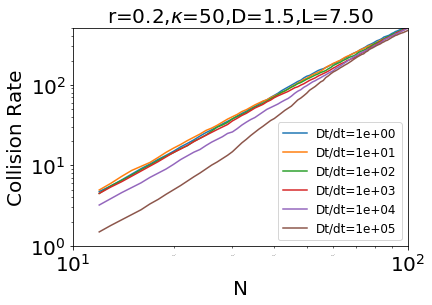

In [212]:
r=0.2;D=1.5;L=L_values[4];kappa=50;
query=(df.set_second==0)&(df.reflect==0)&(df.r==r)&(df.D==D)&(df.L==L)&(df.kappa==kappa)
title=f"r={r:.1f},"+r"$\kappa$="+f"{kappa:.0f},D={D},L={L:.2f}"
dg=df[query].copy()
fontsize=20
Dtdt_lst=[]
m_lst=[]
Delta_m_lst=[]
for Dt_over_dt in Dt_over_dt_values:
    query = dg.Dt_over_dt==Dt_over_dt
    dg2=dg[query].sort_values('N')
    x_values=dg2.N.values
    y_values=dg2.CollRate.values
    c_values=Dt_over_dt+0.*x_values

    plt.plot(x_values,y_values,label=f'Dt/dt={Dt_over_dt:.0e}')#,s=4)#,c=c_values)
#     boo=(x_values>40)&(x_values<60)
#     boo=(x_values<20)
    boo=(x_values>400)
    x=x_values[boo]#[:10]#[300-11:]
    y=y_values[boo]#[:10]#[300-11:]
    dict_out=compute_95CI_ols(np.log(x),np.log(y))
    m=dict_out['m']
    Delta_m=dict_out['Delta_m']*2
    Dtdt_lst.append(Dt_over_dt)
    m_lst.append(m)
    Delta_m_lst.append(Delta_m)
    
    print(f'for Dt/dt={Dt_over_dt:.0e}, m={m:.8f}.')
plt.title(title,fontsize=fontsize)
plt.xlabel('N',fontsize=fontsize)
plt.ylabel('Collision Rate',fontsize=fontsize)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-8)#,ncol=2)
plt.xlim([10,100])
plt.ylim([1,500])
plt.show()

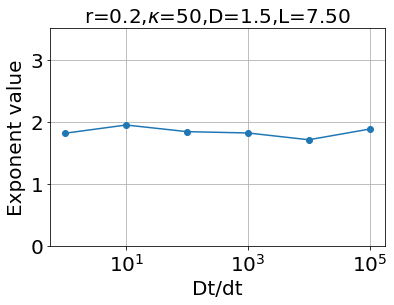

considering N>400 spiral tips


In [213]:

plt.errorbar(Dtdt_lst, m_lst, yerr=Delta_m_lst, fmt='-o')
# plt.scatter(Dtdt_lst,m_lst,marker='^')
plt.xscale('log')
plt.title(title,fontsize=fontsize)
plt.xlabel('Dt/dt',fontsize=fontsize)
plt.ylabel('Exponent value',fontsize=fontsize)
# plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.legend(fontsize=fontsize-8)#,ncol=2)
# plt.xlim([10,50])
plt.ylim([0,3.5])
plt.grid('on')
plt.show()
# print("considering 20<N<50 spiral tips")
# print("considering N<20 spiral tips")
print("considering N>400 spiral tips")

In [201]:
Delta_m_lst

[0.059034519053731346,
 0.03776695710007288,
 0.03405112120119519,
 0.025924545250244766,
 0.05550312569073886,
 0.04149351769918479]

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]


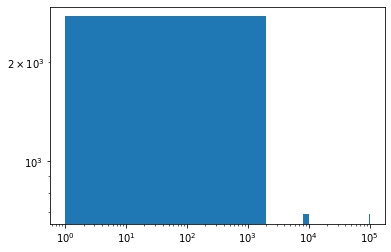

In [116]:
print(sorted(set(dg.Dt.values)))
plt.hist(dg.Dt.values/1e-5,bins=50,log=True)
plt.xscale('log')
plt.show()

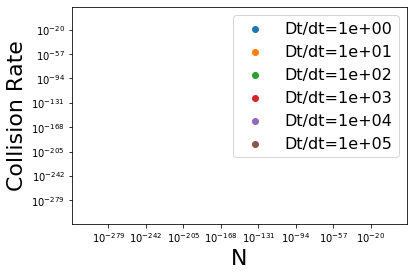

In [66]:
# query=(df.set_second==0)&(df.reflect==0)&(df.r==0.6)&(df.D==2.0)&(df.L==5.)&(df.kappa==5)
# query=(df.set_second==0)&(df.reflect==0)&(df.r==0.6)&(df.D==2.0)&(df.L==5.)&(df.kappa==80)
# query=(df.set_second==1)&(df.reflect==1)&(df.r==0.6)&(df.D==1.0)&(df.L==5.)&(df.kappa==80)
query=(df.set_second==1)&(df.reflect==1)&(df.r==0.1)&(df.D==1.0)&(df.L==5.)&(df.kappa==80)
# query=(df.set_second==0)&(df.reflect==0)&(df.r==0.1)&(df.D==1.0)&(df.L==5.)&(df.kappa==80)
dg=df[query].copy()
dg.head()

fontsize=22
for Dt_over_dt in Dt_over_dt_values:
    query = dg.Dt_over_dt==Dt_over_dt
    dg2=dg[query]
    x_values=dg2.N.values
    y_values=dg2.CollRate.values
    c_values=Dt_over_dt+0.*x_values

    plt.scatter(x_values,y_values,label=f'Dt/dt={Dt_over_dt:.0e}')#,c=c_values)
plt.xlabel('N',fontsize=fontsize)
plt.ylabel('Collision Rate',fontsize=fontsize)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=fontsize-6)
plt.show()

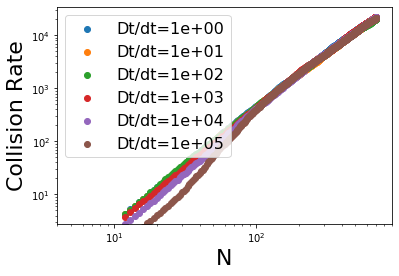

In [39]:
# query=(df.set_second==0)&(df.reflect==0)&(df.r==0.6)&(df.D==2.0)&(df.L==5.)&(df.kappa==5)
# query=(df.set_second==0)&(df.reflect==0)&(df.r==0.6)&(df.D==2.0)&(df.L==5.)&(df.kappa==80)
# query=(df.set_second==1)&(df.reflect==1)&(df.r==0.6)&(df.D==1.0)&(df.L==5.)&(df.kappa==80)
query=(df.set_second==1)&(df.reflect==1)&(df.r==0.1)&(df.D==1.0)&(df.L==5.)&(df.kappa==80)
# query=(df.set_second==0)&(df.reflect==0)&(df.r==0.1)&(df.D==1.0)&(df.L==5.)&(df.kappa==80)
dg=df[query].copy()
dg.head()

fontsize=22
for Dt_over_dt in Dt_over_dt_values:
    query = dg.Dt_over_dt==Dt_over_dt
    dg2=dg[query]
    x_values=dg2.N.values
    y_values=dg2.CollRate.values
    c_values=Dt_over_dt+0.*x_values

    plt.scatter(x_values,y_values,label=f'Dt/dt={Dt_over_dt:.0e}')#,c=c_values)
plt.xlabel('N',fontsize=fontsize)
plt.ylabel('Collision Rate',fontsize=fontsize)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=fontsize-6)
plt.show()

In [60]:
#compute w_lr and w_fk using a linear regression of a log-log plot
query=dg.N>600
x=dg[query].N.values
y=dg[query].CollRate.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_out

{'m': 1.8288576053075265,
 'Delta_m': 0.02361594204065275,
 'b': -1.9860325099266927,
 'Delta_b': 0.15295826988090527,
 'Rsquared': 0.9756780445764814}

In [61]:
#compute w_lr and w_fk using a linear regression of a log-log plot
query=dg.N>100
x=dg[query].N.values
y=dg[query].CollRate.values
dict_out=compute_95CI_ols(np.log(x),np.log(y))
dict_out

{'m': 1.945393802835898,
 'Delta_m': 0.0018218528482749382,
 'b': -2.7170452811891384,
 'Delta_b': 0.010747714138160612,
 'Rsquared': 0.9992117386535017}

# plot over large ranges with LR, FK results overlayed

In [12]:
#load birth death rates from the full model
data_folder=f'{nb_dir}/data'
os.chdir(data_folder)

data_fk_fn='full_results/data_fig4_vidmar_fk_tt.csv'
data_lr_fn='full_results/data_fig4_vidmar_lr_tt.csv'

fk=pd.read_csv(data_fk_fn)
fk['N']=fk['No2']*2
fk['q']=fk['N']/fk['A'] #number of tips per square centimeter
fk['w']=fk['rate']/fk['A'] #[mHz?]/cm^2

lr=pd.read_csv(data_lr_fn)
lr['N']=lr['No2']*2
lr['q']=lr['N']/lr['A'] #number of tips per square centimeter
lr['w']=lr['rate']/lr['A'] #[mHz?]/cm^2



In [24]:
kappa_values

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 250, 500])

for r=0.1, m=2.03540757.
for r=1.0, m=2.07841187.
for r=2.0, m=2.02170852.


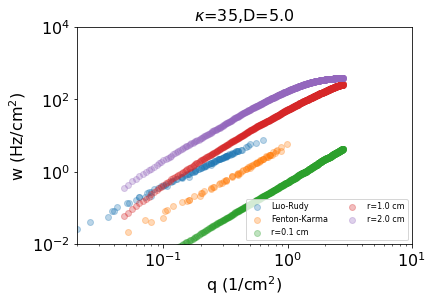

In [33]:
#plot up WJ's results
yscale=10**3
plt.scatter(x=lr.q.values,y=yscale*lr.w.values,alpha=0.3,label='Luo-Rudy')
plt.scatter(x=fk.q.values,y=yscale*fk.w.values,alpha=0.3,label='Fenton-Karma')

D=5.;kappa=35;Dt_over_dt=1.;L=L_values[-1]
query=(df.set_second==0)&(df.reflect==0)&(df.Dt_over_dt==Dt_over_dt)&(df.D==D)&(df.kappa==kappa)&(df.L==L)
title=r"$\kappa$="+f"{kappa:.0f},D={D}"
# title=f"r={r:.1f},"+r"$\kappa$="+f"{kappa:.0f},D={D}"
dg=df[query].copy()
fontsize=16
r_lst=[]
m_lst=[]
Delta_m_lst=[]
q_min=.02;q_max=.2 #low density
q_min=0.2;q_max=.4 #high density
for r in [.1,1,2]:#r_values:#
    query2 = dg.r==r
    dg2=dg[query2].sort_values('q')
    x_values=dg2.q.values
    y_values=dg2.w.values
#     c_values=Dt_over_dt+0.*x_values

    plt.scatter(x_values,y_values,label=f'r={r:.1f} cm',alpha=0.3)#,s=4)#,c=c_values)
#     boo=(x_values>40)&(x_values<60)
#     boo=(x_values<20)
    boo=(x_values>q_min)&(x_values<q_max)
    x=x_values[boo]#[:10]#[300-11:]
    y=y_values[boo]#[:10]#[300-11:]
    dict_out=compute_95CI_ols(np.log(x),np.log(y))
    m=dict_out['m']
    Delta_m=dict_out['Delta_m']*2
    r_lst.append(r)
    m_lst.append(m)
    Delta_m_lst.append(Delta_m)
    
    print(f'for r={r:.1f}, m={m:.8f}.')
plt.title(title,fontsize=fontsize)
plt.xlabel(r'q (1/cm$^2$)',fontsize=fontsize)
plt.ylabel(r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-8,ncol=2,loc='lower right')
plt.xlim([.02,10])
plt.ylim([0.01,10000])
plt.show()

- the trend of m versus r appears linearly decreasing for $r>0.25$ cm and appears to be independent of D.
- Hypothesis: m>=2 for kappa = relevant to our models

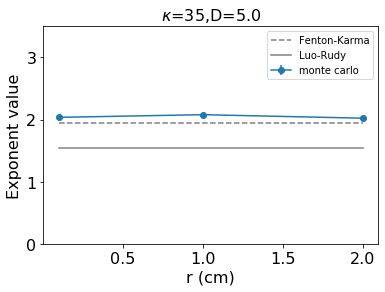

considering 0.2<q<0.4


In [34]:
m_fk=1.945#1.858;#+-0.027; B_fk=2.464+-0.030<br>
m_lr=1.544#1.638;#+-0.017; B_fk=5.588+-0.067
plt.errorbar(r_lst, m_lst, yerr=Delta_m_lst, fmt='-o',label='monte carlo')
plt.plot(r_lst, m_fk+0.*np.array(r_lst), '--',c='gray',label='Fenton-Karma')
plt.plot(r_lst, m_lr+0.*np.array(r_lst), '-',c='gray',label='Luo-Rudy')

# plt.scatter(Dtdt_lst,m_lst,marker='^')
# plt.xscale('log')
plt.title(title,fontsize=fontsize)
plt.xlabel('r (cm)',fontsize=fontsize)
plt.ylabel('Exponent value',fontsize=fontsize)
# plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.legend(fontsize=fontsize-8)#,ncol=2)
# plt.xlim([10,50])
plt.ylim([0,3.5])
# plt.grid('on')
plt.legend()
plt.show()
# print("considering 20<N<50 spiral tips")
# print("considering N<20 spiral tips")
print(f"considering {q_min}<q<{q_max}")

df.head()

In [324]:
df[df.L==L_values[0]]

,set_second,reflect,r,niter,kappa,N,L,Dt,D,CollRate,Dt_over_dt,A,q,w
0,0,0,0.1,1500,5,12,4.5,0.00001,0.2,0.457629,1.0,20.25,0.592593,0.022599
1,0,0,0.1,1500,5,12,4.5,0.00001,1.0,0.489757,1.0,20.25,0.592593,0.024186
2,0,0,0.1,1500,5,12,4.5,0.00001,1.5,0.472636,1.0,20.25,0.592593,0.023340
3,0,0,0.1,1500,5,12,4.5,0.00001,2.0,0.518877,1.0,20.25,0.592593,0.025624
4,0,0,0.1,1500,5,12,4.5,0.00001,3.0,0.517302,1.0,20.25,0.592593,0.025546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125407391,0,1,2.0,1500,500,700,4.5,1.00000,1.5,100000.000000,100000.0,20.25,34.567901,4938.271605
125407392,0,1,2.0,1500,500,700,4.5,1.00000,2.0,100000.000000,100000.0,20.25,34.567901,4938.271605
125407393,0,1,2.0,1500,500,700,4.5,1.00000,3.0,100000.000000,100000.0,20.25,34.567901,4938.271605
125407394,0,1,2.0,1500,500,700,4.5,1.00000,4.0,100000.000000,100000.0,20.25,34.567901,4938.271605


- DONE: put the pictures i already took into a slide or so
# TODO(with gpu): measure m,M for plots of monte carlo trials
# TODO: rescale by to universal plot for m=2.  measure slope/m,M
# TODO: measure whether a turning point exists
# TODO: measure turning points when they exist

# TODO: plot up WJ's ncbc data and give them slides as in the pbc case

$$
w=M q^m,\; M=\tilde M \kappa r^{2(m-1)},\;\text{ for } m=2,\, \tilde M = \frac{\pi}{2}.
$$

- TODO: randomly switch between reacting/non-reacting modes.
- TODO: give each brownian particle a randomly selected charge if the net charge is 0, else decrease absolute net charge towards zero 
- TODO: rerun with dt=1e-7 or dt=1e-8

# design run 7

In [6]:
import numpy as np
niter=250 #trials per worker
r_values=np.array([0.1,0.5,1.,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.,2.5,5.,10.,20.])#cm
D_values=np.array([0.2,1.0,1.5,2.0,5.,10,20])#cm^2/s
A_values=np.array([20.25,25,39,50,56.25,100,156.25,189,250])[::-1]#cm^2
L_values=np.sqrt(A_values)#cm
# kappa_values=np.array([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,250,500])#1/s
# beta_values=np.array([0.01,0.05,0.01,0.1,0.5,1])#cm
Dt_values=np.array([1.])
reflect_values=np.array([0])
set_second_values=np.array([0])
m_values=np.array([1.8772341309722325, 1.6375562704001745])
M_values=np.array([5.572315674840435,16.73559858353835])
num_trials_per_setting=6

Dratio_values=np.array([1,10,100,1000])
energy_gap_values=np.array(sorted([0.,-10,10,0.5,1,2,-1]))
temperature_energy_values=np.array([1.])

def comp_M_tilde(m):
    '''non-quadratic trend is guessed to make bounds'''
    val_lst=[]
    val_lst.append(np.pi**(m-1)/m)
    val_lst.append(np.pi**(m-1)/2)
    val_lst.append(np.pi/2)
    val_lst.append((np.pi/2)**(m-1))
    mn=np.min(val_lst)
    mx=np.max(val_lst)
    return mn,mx

def comp_kappa(M,m,r):
    '''returns a min/max estimate for kappa using the emergent universal law'''
    mn,mx=comp_M_tilde(m)
    kappa_mn=r**(-2*(m-1))*M/mx
    kappa_mx=r**(-2*(m-1))*M/mn
    return kappa_mn,kappa_mx

#iterate over settings, scheduling the longest jobs first
count=0
for set_second in set_second_values:
    for r in r_values:
        for D in D_values:
            for L in L_values:
                for Dt in Dt_values:
                    for reflect in reflect_values:
                        for m,M in zip(m_values,M_values):
                            kappa_mn_mx=comp_kappa(M,m,r)
                            kappa_values=np.array(sorted(set([kappa_mn_mx[0],(kappa_mn_mx[0]+kappa_mn_mx[1])/2.,kappa_mn_mx[1]])))
                            for kappa in kappa_values:
                                for Dratio in Dratio_values:
                                    for temperature_energy in temperature_energy_values:
                                        for energy_gap in energy_gap_values:
                                            num_trials=0
                                            while num_trials<num_trials_per_setting:
                                                num_trials+=1
                                                count=count+1
#                                                 print(f"{r} {D} {L} {Dt} {niter} {reflect} {set_second} {temperature_energy} {energy_gap} {Dratio}")
print(count)

1079568


In [17]:
import numpy as np
niter=250 #trials per worker
r_values=np.array([0.1,0.5,1.,1.5,2.,2.5,5.,10.])#cm
# r_values=np.array([0.1,0.5,1.,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.,2.5,5.,10.,20.])#cm
D_values=np.array([0.2,1.0,1.5,2.0,5.,10,20])#cm^2/s
A_values=np.array([20.25,25,50,100,156.25,250])[::-1]#cm^2
# A_values=np.array([20.25,25,39,50,56.25,100,156.25,189,250])[::-1]#cm^2
L_values=np.sqrt(A_values)#cm
# kappa_values=np.array([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,250,500])#1/s
# beta_values=np.array([0.01,0.05,0.01,0.1,0.5,1])#cm
Dt_values=np.array([1e-7])
reflect_values=np.array([0])
set_second_values=np.array([0])
m_values=np.array([1.8772341309722325, 1.6375562704001745])
M_values=np.array([5.572315674840435,16.73559858353835])
num_trials_per_setting=6

Dratio_values=np.array([1,10,100,1000])
energy_gap_values=np.array(sorted([0.,-10,10,0.5,1,2,-1]))
temperature_energy_values=np.array([1.])

def comp_M_tilde(m):
    '''non-quadratic trend is guessed to make bounds'''
    val_lst=[]
    val_lst.append(np.pi**(m-1)/m)
    val_lst.append(np.pi**(m-1)/2)
    val_lst.append(np.pi/2)
    val_lst.append((np.pi/2)**(m-1))
    mn=np.min(val_lst)
    mx=np.max(val_lst)
    return mn,mx

def comp_kappa(M,m,r):
    '''returns a min/max estimate for kappa using the emergent universal law'''
    mn,mx=comp_M_tilde(m)
    kappa_mn=r**(-2*(m-1))*M/mx
    kappa_mx=r**(-2*(m-1))*M/mn
    return kappa_mn,kappa_mx

#iterate over settings, scheduling the longest jobs first
count=0
for set_second in set_second_values:
    for r in r_values:
        for D in D_values:
            for L in L_values:
                for Dt in Dt_values:
                    for reflect in reflect_values:
                        for m,M in zip(m_values,M_values):
                            # for kappa in kappa_values:
                            kappa_mn_mx=comp_kappa(M,m,r)
                            kappa_values=np.array(sorted(set([kappa_mn_mx[0],(kappa_mn_mx[0]+kappa_mn_mx[1])/2.,kappa_mn_mx[1]])))
                            kappa = np.mean(kappa_values)
                            for Dratio in Dratio_values:
                                for temperature_energy in temperature_energy_values:
                                    for energy_gap in energy_gap_values:
                                        num_trials=0
                                        while num_trials<num_trials_per_setting:
                                            num_trials+=1
                                            count=count+1
#                                             print(f"{r} {D} {L:.5f} {kappa:.5f} {Dt} {niter} {reflect} {set_second} {temperature_energy} {energy_gap} {Dratio}")
print(count)


112896


# TODO: test/dev command line function that converts a single trial into a row with the following fields:
- m,Delta_m,Rsq_m,M,Delta_M,Rsq_M, q_min,q_max, {input_params}
- Hint: try using multiindexing, with kappa at the end, to map df(all runs) to df(single run)

In [1]:
#TODO: import latest DataFrame

/home/timothytyree/Documents/GitHub/bgmc/python


In [ ]:
# def merge_folder(folder,trgt='.out.',return_df=False):
#     '''merge all files in folder matching trgt.
#     runtime was ~10 seconds for ~3000 files.'''
#     #get all files in folder
#     assert(os.path.exists(folder))
#     input_fn_lst=get_files_in_folder(folder,trgt)
#     print(f"merging {len(input_fn_lst)} files...")
#     #merge all files in folder as df
#     df=pd.concat([pd.read_csv(fn) for fn in input_fn_lst])
#     #groupby col_names minus CollRate
#     param_names=sorted(set(df.columns.values).difference({'CollTime','Rad'}))[::-1]
#     #compute mean value
#     dfm=df.groupby(param_names).mean()
#     dfm.reset_index(inplace=True)
#     #compute CollRate and drop CollTime
#     dfm['CollRate']=1./dfm['CollTime'] #Hz
#     dfm.drop(columns=['CollTime'],inplace=True)
#     #save as csv
#     save_fn=os.path.basename(folder)+'.csv'
#     os.chdir(os.path.dirname(folder))
#     dfm.to_csv(save_fn,index=False)
#     print(f'mean Collision rates saved in\n{os.path.abspath(save_fn)}')
#     if return_df:
#         return dfm
#     else:
#         return True

In [9]:
folder="data/osg_output/run_7_all"
input_fn_lst=get_files_in_folder(folder,trgt='.out.')
fn=input_fn_lst[7]
fn

'job.out.8925250.105153'

In [11]:
df=pd.read_csv(fn)
df.head()

,N,CollTime,r,D,L,kappa,reflect,set_second,niter,dt,Dt
0,12,0.119640,0.7,1.5,12.5,35,1,0,1500,0.00001,0.0001
1,13,0.098005,0.7,1.5,12.5,35,1,0,1500,0.00001,0.0001
2,14,0.078168,0.7,1.5,12.5,35,1,0,1500,0.00001,0.0001
3,15,0.062821,0.7,1.5,12.5,35,1,0,1500,0.00001,0.0001
4,16,0.052384,0.7,1.5,12.5,35,1,0,1500,0.00001,0.0001


In [ ]:
df.

In [ ]:
def load_df_bgmc(fn, **kwargs):
    df=pd.load_csv(fn, **kwargs)
    #TODO: compute q,w
    #TODO: compute power law fit in range
    q_min=0.2;q_max=0.3
    #TODO: make dict of input_params
    #TODO: add fields for fit
    #TODO: return dict_out

In [ ]:
yscale=10**3
df=load_df_bgmc(fn)#.sort_values('x')
x=df.q.values
y=yscale*df.q.values

# print_fit_power_law(x,y)
B,Delta_B,m,Delta_m,Rsq=fit_power_law(x,y)
rmse=compute_power_rmse(x,y,m,B)
M, Delta_M= comp_power_scale(B,Delta_B,m,Delta_m)
print(f"m={m:.3f}+-{Delta_m:.3f}; B={B:.3f}+-{Delta_B:.3f}")
print(f"M=B**m={M:.2f}+-{Delta_M:.2f} Hz*cm^{{2(m-1)}}")
print(f"RMSE={rmse:.4f} Hz/cm^2")
print(f"R^2={Rsq:.3f}")